### Loading the required libraries

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Reading the dataset

In [9]:
titanic = pd.read_csv("C:/Users/Digant/Desktop/titanic.csv")
#print(titanic.shape)
print(titanic.head(5))
print('Number of passangers = '+str(len(titanic)))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Nu

### Data Visualization

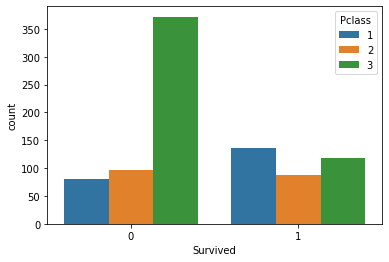

In [10]:
sns.countplot(x="Survived", hue="Pclass", data=titanic)
plt.show()

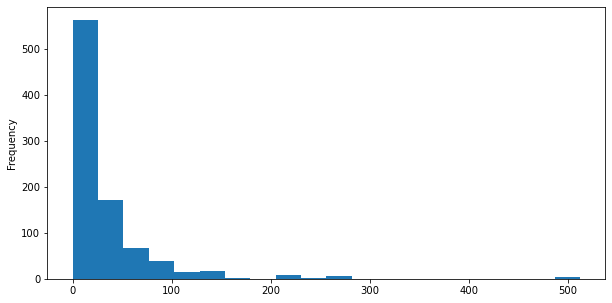

In [11]:
titanic["Fare"].plot.hist(bins=20, figsize=(10,5))
plt.show()

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

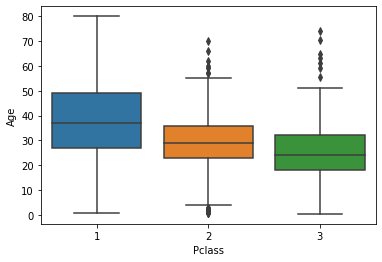

In [13]:
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

### Data Wrangling

In [14]:
titanic.drop("Cabin",inplace=True,axis=1)

In [15]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)
embarked = pd.get_dummies(titanic["Embarked"], drop_first=True)
pclass = pd.get_dummies(titanic["Pclass"],drop_first = True)
titanic = pd.concat([titanic,sex,embarked,pclass],axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [17]:
titanic.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


### Training the dataset

In [18]:
x = titanic.drop(["Survived"],axis=1)
y = titanic["Survived"]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)

In [21]:
from sklearn.linear_model import LogisticRegression
lmo = LogisticRegression()
lmo.fit(x_train,y_train)

C:\Users\Digant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = lmo.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       136
           1       0.84      0.70      0.76        99

    accuracy                           0.82       235
   macro avg       0.82      0.80      0.81       235
weighted avg       0.82      0.82      0.81       235

[[123  13]
 [ 30  69]]
0.8170212765957446
